In [ ]:
Arvid Lundervold, 2025-01-15

# Pytorch Lightning basics



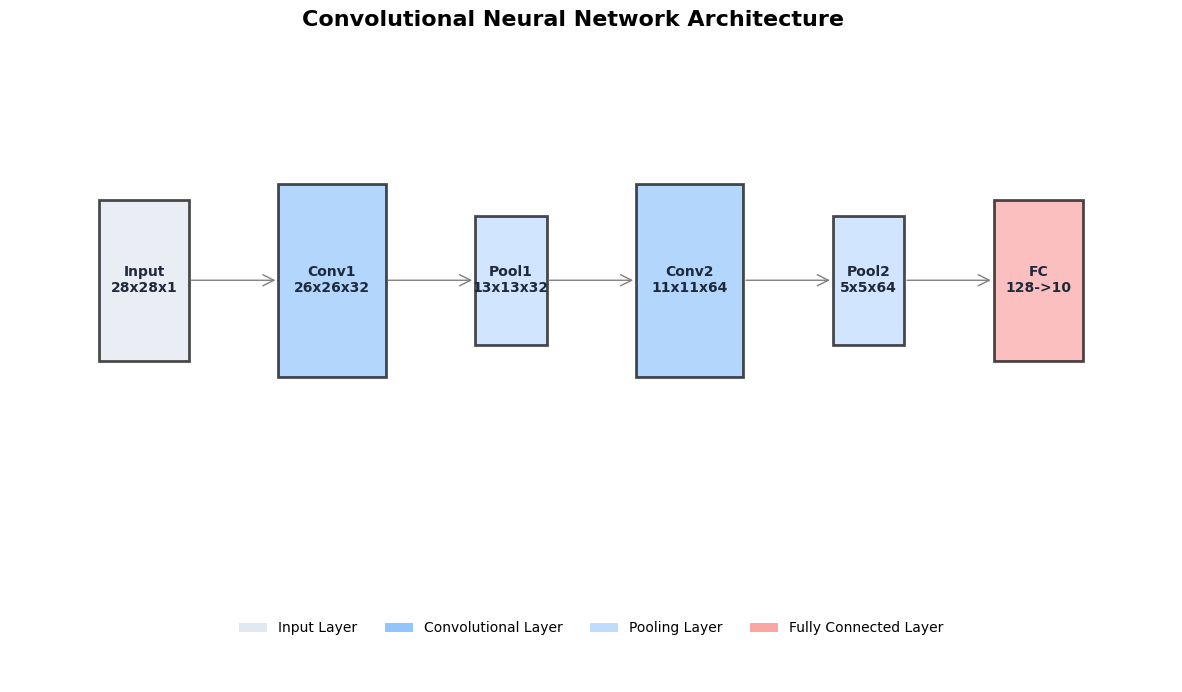

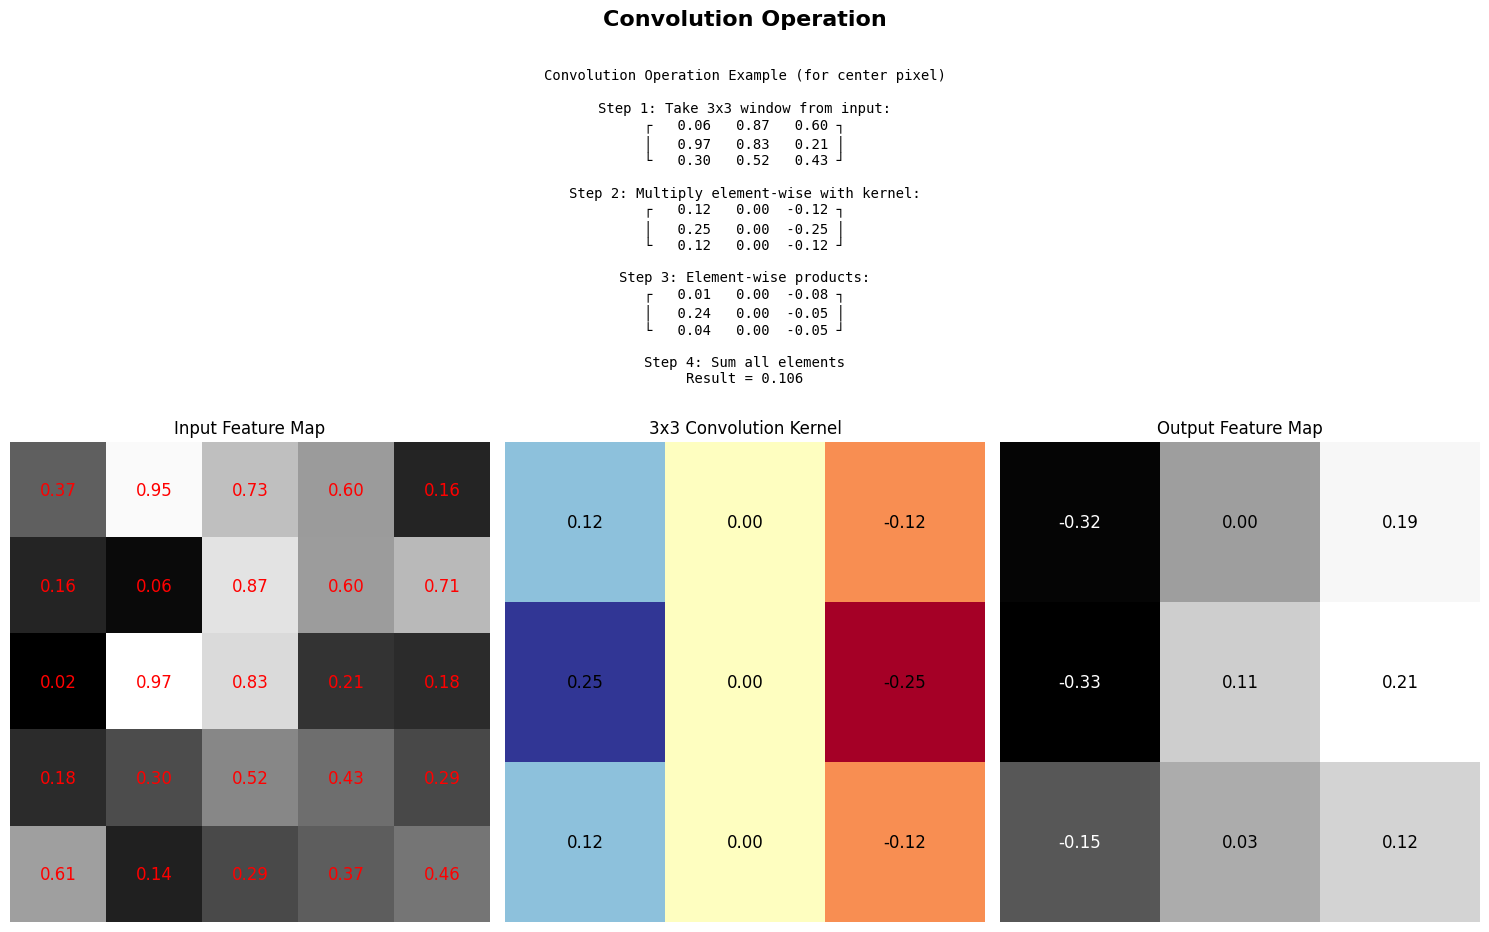

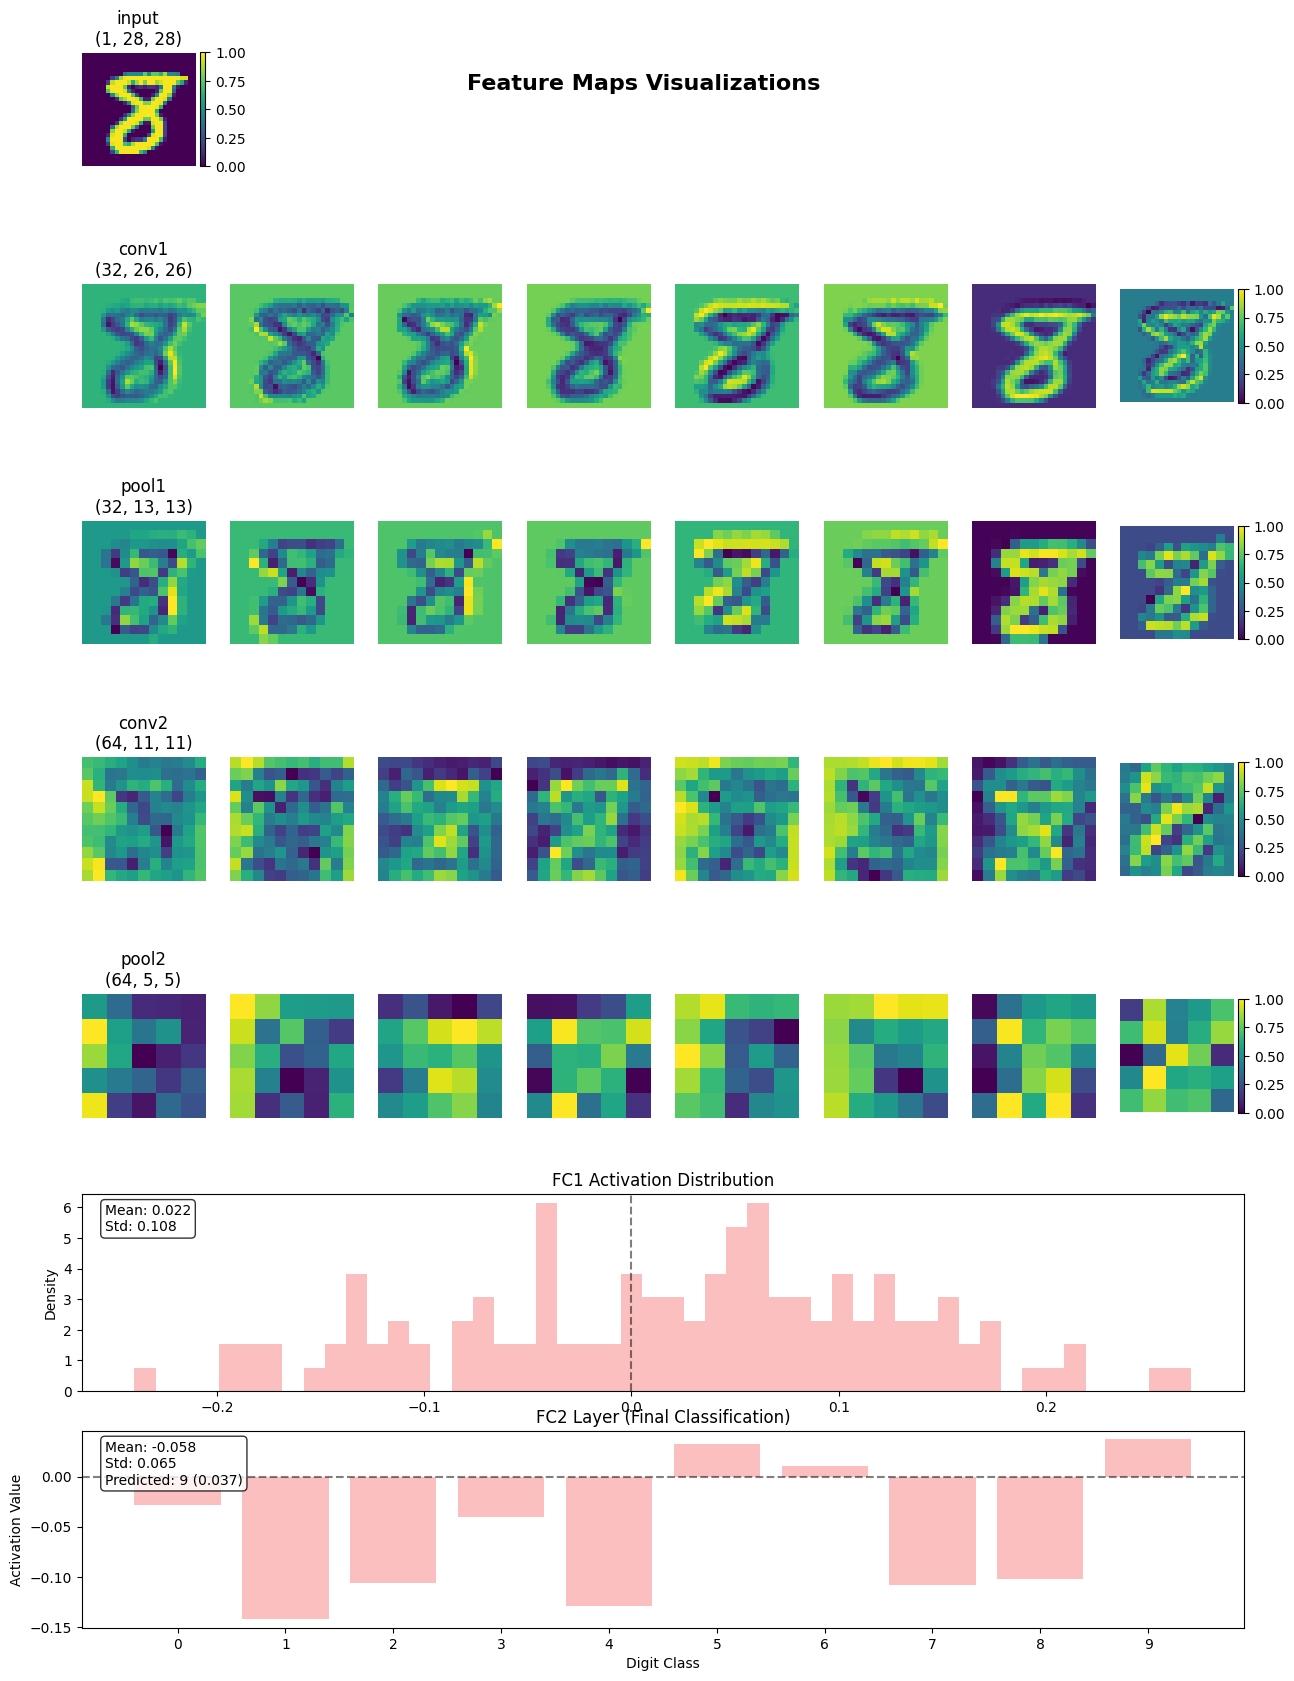

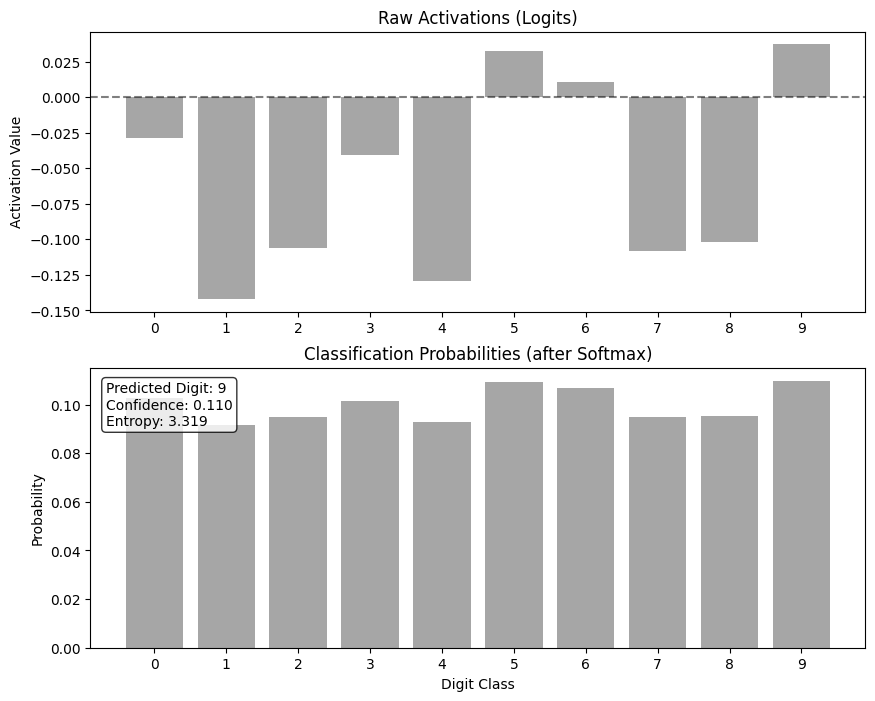

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import torch
import torch.nn as nn
from matplotlib.patches import FancyArrowPatch
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['font.family'] = 'sans-serif'

class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)  # 28x28x1 -> 26x26x32
        self.pool1 = nn.MaxPool2d(2, 2)   # 26x26x32 -> 13x13x32
        self.conv2 = nn.Conv2d(32, 64, 3) # 13x13x32 -> 11x11x64
        self.pool2 = nn.MaxPool2d(2, 2)   # 11x11x64 -> 5x5x64
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        layers = {}
        layers['input'] = x
        x = self.conv1(x)
        layers['conv1'] = x
        x = self.pool1(x)
        layers['pool1'] = x
        x = self.conv2(x)
        layers['conv2'] = x
        x = self.pool2(x)
        layers['pool2'] = x
        x = x.view(-1, 64 * 5 * 5)
        x = self.fc1(x)
        layers['fc1'] = x
        x = self.fc2(x)
        layers['fc2'] = x
        return x, layers

class CNNVisualizer:
    def __init__(self):
        self.colors = {
            'input': '#e2e8f0',
            'conv': '#93c5fd',
            'pool': '#bfdbfe',
            'fc': '#fca5a5',
            'text': '#1e293b'
        }
        
    def draw_architecture(self, save_path=None):
        """Draw the CNN architecture diagram"""
        # Create figure
        fig = plt.figure(figsize=(15, 8))
        gs = GridSpec(2, 1, height_ratios=[4, 1], hspace=0.3)
        ax_arch = fig.add_subplot(gs[0])
        ax_legend = fig.add_subplot(gs[1])
        
        # Layer configurations
        layers = [
            {'name': 'Input\n28x28x1', 'type': 'input', 'width': 1.0},  # Changed × to x
            {'name': 'Conv1\n26x26x32', 'type': 'conv', 'width': 1.2},
            {'name': 'Pool1\n13x13x32', 'type': 'pool', 'width': 0.8},
            {'name': 'Conv2\n11x11x64', 'type': 'conv', 'width': 1.2},
            {'name': 'Pool2\n5x5x64', 'type': 'pool', 'width': 0.8},
            {'name': 'FC\n128->10', 'type': 'fc', 'width': 1.0}  # Changed → to ->
        ]
        
        # Draw layers
        x_offset = 1
        for i, layer in enumerate(layers):
            height = layer['width'] * 1.5
            width = layer['width']
            
            # Calculate y position to center the block
            y_pos = (4 - height) / 2
            
            # Draw the block
            rect = patches.Rectangle(
                (x_offset, y_pos), width, height,
                facecolor=self.colors[layer['type']],
                edgecolor='black',
                alpha=0.7,
                linewidth=2
            )
            ax_arch.add_patch(rect)
            
            # Add text
            ax_arch.text(
                x_offset + width/2, 
                y_pos + height/2,
                layer['name'],
                ha='center',
                va='center',
                color=self.colors['text'],
                fontsize=10,
                fontweight='bold'
            )
            
            # Add arrow if not last layer
            if i < len(layers) - 1:
                arrow = FancyArrowPatch(
                    (x_offset + width, y_pos + height/2),
                    (x_offset + width + 1, y_pos + height/2),
                    arrowstyle='->',
                    mutation_scale=20,
                    color='gray'
                )
                ax_arch.add_patch(arrow)
            
            x_offset += width + 1
        
        # Set plot limits and remove axes
        ax_arch.set_xlim(0, x_offset)
        ax_arch.set_ylim(0, 4)
        ax_arch.axis('off')
        
        # Add legend
        legend_elements = [
            patches.Patch(facecolor=self.colors['input'], label='Input Layer'),
            patches.Patch(facecolor=self.colors['conv'], label='Convolutional Layer'),
            patches.Patch(facecolor=self.colors['pool'], label='Pooling Layer'),
            patches.Patch(facecolor=self.colors['fc'], label='Fully Connected Layer')
        ]
        ax_legend.legend(
            handles=legend_elements,
            loc='center',
            ncol=4,
            frameon=False
        )
        ax_legend.axis('off')
        
        # Add title
        plt.suptitle('Convolutional Neural Network Architecture', 
                    fontsize=16, fontweight='bold', y=0.95)
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            
        return fig



    def visualize_classification(self, activations, save_path=None):
        """
        Visualize the classification results from the FC2 layer.
        
        Args:
            activations (numpy.ndarray): Raw activation values from FC2 layer
            save_path (str, optional): Path to save the visualization. Defaults to None.
        
        Returns:
            matplotlib.figure.Figure: The figure containing the visualization
        """
        # Convert to probabilities using softmax
        probabilities = torch.softmax(torch.tensor(activations), dim=0).numpy()
        
        # Create figure with two subplots
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), height_ratios=[1, 1])
        
        # Plot raw activations
        x = np.arange(len(activations))
        ax1.bar(x, activations, alpha=0.7, color='gray') #self.colors['fc'])
        ax1.set_xticks(x)
        ax1.set_xticklabels([str(i) for i in range(10)])
        ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
        ax1.set_title('Raw Activations (Logits)')
        ax1.set_ylabel('Activation Value')
        
        # Plot probabilities
        ax2.bar(x, probabilities, alpha=0.7, color='gray') #self.colors['fc']) 
        ax2.set_xticks(x)
        ax2.set_xticklabels([str(i) for i in range(10)])
        ax2.set_title('Classification Probabilities (after Softmax)')
        ax2.set_xlabel('Digit Class')
        ax2.set_ylabel('Probability')
        
        # Add statistics
        predicted_digit = np.argmax(probabilities)
        max_prob = np.max(probabilities)
        entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))
        
        stats_text = (
            f'Predicted Digit: {predicted_digit}\n'
            f'Confidence: {max_prob:.3f}\n'
            f'Entropy: {entropy:.3f}'
        )
        
        ax2.text(0.02, 0.95, stats_text,
                transform=ax2.transAxes,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        #plt.suptitle('MNIST Digit Classification Analysis', fontsize=12, fontweight='bold')
        #plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
        
        return fig



    def visualize_feature_maps(self, model, input_image, save_path=None):
        """Visualize feature maps at each layer of the CNN"""
        # Ensure model is in eval mode
        model.eval()
        
        # Forward pass with feature map collection
        with torch.no_grad():
            _, feature_maps = model(input_image)
        
        # Create figure with dynamic size
        n_layers = len(feature_maps)
        n_cols = 8  # Maximum number of feature maps per layer
        fig = plt.figure(figsize=(15, 3 * n_layers))
        
        # Plot feature maps for each layer
        for idx, (layer_name, feature_map) in enumerate(feature_maps.items()):
            feature_map = feature_map.squeeze(0)  # Remove batch dimension
            
            if layer_name in ['fc1', 'fc2']:
                ax = plt.subplot(n_layers, 1, idx + 1)
                data = feature_map.numpy()


                if layer_name == 'fc2':
                    # For FC2 (final layer), create bar plot with digit labels
                    x = np.arange(len(data))
                    ax.bar(x, data, alpha=0.7, color=self.colors['fc'])
                    ax.set_xticks(x)
                    ax.set_xticklabels([str(i) for i in range(10)])
                    ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
                    
                    # Add statistics
                    mean_val = np.mean(data)
                    std_val = np.std(data)
                    max_digit = np.argmax(data)
                    max_val = np.max(data)
                    
                    stats_text = (
                        f'Mean: {mean_val:.3f}\n'
                        f'Std: {std_val:.3f}\n'
                        f'Predicted: {max_digit} ({max_val:.3f})'
                    )
                    
                    ax.text(0.02, 0.95, stats_text,
                        transform=ax.transAxes,
                        verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
                    
                    ax.set_title('FC2 Layer (Final Classification)')
                    ax.set_xlabel('Digit Class')
                    ax.set_ylabel('Activation Value')

                    # Create separate classification visualization
                    class_fig = self.visualize_classification(data, 'classification.png')
                    
                    # For the feature maps visualization, show simplified version
                    #ax = plt.subplot(n_layers, 1, idx + 1)
                    #x = np.arange(len(data))
                    #ax.bar(x, data, alpha=0.7, color=self.colors['fc'])
                    #ax.set_xticks(x)
                    #ax.set_xticklabels([str(i) for i in range(10)])
                    #ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
                    #ax.set_title('FC2 Layer (Final Classification)')
                    #ax.set_xlabel('Digit Class')
                    #ax.set_ylabel('Activation Value')

                    
                else:
                    # For FC1, keep the histogram visualization
                    ax.hist(data, bins=50, density=True, alpha=0.7, color=self.colors['fc'])
                    ax.axvline(x=0, color='black', linestyle='--', alpha=0.5)
                    
                    # Add statistics
                    mean_val = np.mean(data)
                    std_val = np.std(data)
                    ax.text(0.02, 0.95, 
                        f'Mean: {mean_val:.3f}\nStd: {std_val:.3f}',
                        transform=ax.transAxes,
                        verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
                    
                    ax.set_title('FC1 Activation Distribution')
                    #ax.set_xlabel('Activation Value')
                    ax.set_ylabel('Density')
                
            else:
                # For conv/pool layers, show feature maps
                n_filters = min(n_cols, feature_map.shape[0])
                for i in range(n_filters):
                    ax = plt.subplot(n_layers, n_cols, idx * n_cols + i + 1)
                    
                    # Normalize feature map for better visualization
                    fm = feature_map[i].numpy()
                    vmin, vmax = fm.min(), fm.max()
                    if vmin != vmax:
                        fm = (fm - vmin) / (vmax - vmin)
                    
                    im = ax.imshow(fm, cmap='viridis')
                    ax.axis('off')
                    
                    # Add title to first feature map in row
                    if i == 0:
                        ax.set_title(f'{layer_name}\n{tuple(feature_map.shape)}')
                    
                    # Add colorbar to last feature map in row
                    if i == n_filters - 1:
                        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        
                plt.suptitle('Feature Maps Visualizations', 
                        fontsize=16, 
                        fontweight='bold', 
                        y=0.85) # Increase y value to move title up
                #plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
        
        return fig  
     

    def visualize_convolution(self, save_path=None):
        """Visualize the convolution operation"""
        # Create figure with extra space for equations
        fig = plt.figure(figsize=(15, 10))
        gs = GridSpec(2, 3, height_ratios=[1, 2])
        
        # Create axes for equations and images
        ax_eq = fig.add_subplot(gs[0, :])
        ax1 = fig.add_subplot(gs[1, 0])
        ax2 = fig.add_subplot(gs[1, 1])
        ax3 = fig.add_subplot(gs[1, 2])
        
        # Create example input, kernel, and output
        np.random.seed(42)
        input_data = np.random.rand(5, 5)
        kernel = np.array([[1, 0, -1],
                        [2, 0, -2],
                        [1, 0, -1]]) / 8
        
        # Calculate output
        output = np.zeros((3, 3))
        for i in range(3):
            for j in range(3):
                output[i, j] = np.sum(input_data[i:i+3, j:j+3] * kernel)
        
        # Create text equation for center pixel calculation
        i, j = 1, 1  # Center position
        window = input_data[i:i+3, j:j+3]
        result = output[i, j]  # Fixed: use i,j instead of i-1,j-1
        
        # Calculate element-wise products for visualization
        products = window * kernel
        
        # Create a more detailed explanation with ASCII art style matrices
        eq_text = (
            "Convolution Operation Example (for center pixel)\n\n"
            "Step 1: Take 3x3 window from input:\n"
            f"┌ {window[0,0]:6.2f} {window[0,1]:6.2f} {window[0,2]:6.2f} ┐\n"
            f"│ {window[1,0]:6.2f} {window[1,1]:6.2f} {window[1,2]:6.2f} │\n"
            f"└ {window[2,0]:6.2f} {window[2,1]:6.2f} {window[2,2]:6.2f} ┘\n\n"
            "Step 2: Multiply element-wise with kernel:\n"
            f"┌ {kernel[0,0]:6.2f} {kernel[0,1]:6.2f} {kernel[0,2]:6.2f} ┐\n"
            f"│ {kernel[1,0]:6.2f} {kernel[1,1]:6.2f} {kernel[1,2]:6.2f} │\n"
            f"└ {kernel[2,0]:6.2f} {kernel[2,1]:6.2f} {kernel[2,2]:6.2f} ┘\n\n"
            "Step 3: Element-wise products:\n"
            f"┌ {products[0,0]:6.2f} {products[0,1]:6.2f} {products[0,2]:6.2f} ┐\n"
            f"│ {products[1,0]:6.2f} {products[1,1]:6.2f} {products[1,2]:6.2f} │\n"
            f"└ {products[2,0]:6.2f} {products[2,1]:6.2f} {products[2,2]:6.2f} ┘\n\n"
            "Step 4: Sum all elements\n"
            f"Result = {result:.3f}"
        )
        
        # Add equation with monospace font for alignment
        ax_eq.text(0.5, 0.5, eq_text,
                ha='center', va='center',
                transform=ax_eq.transAxes,
                fontsize=10,
                family='monospace')
        ax_eq.axis('off')
        
        # Plot input with values
        im1 = ax1.imshow(input_data, cmap='gray')
        for i in range(input_data.shape[0]):
            for j in range(input_data.shape[1]):
                text = ax1.text(j, i, f'{input_data[i, j]:.2f}',
                            ha='center', va='center', 
                            color='red', fontsize=12)
        ax1.set_title('Input Feature Map')
        ax1.axis('off')
        
        # Plot kernel with values
        im2 = ax2.imshow(kernel, cmap='RdYlBu')
        for i in range(kernel.shape[0]):
            for j in range(kernel.shape[1]):
                text = ax2.text(j, i, f'{kernel[i, j]:.2f}',
                            ha='center', va='center', 
                            color='black', fontsize=12)
        ax2.set_title('3x3 Convolution Kernel')
        ax2.axis('off')
        
        # Plot output with values
        im3 = ax3.imshow(output, cmap='gray')
        for i in range(output.shape[0]):
            for j in range(output.shape[1]):
                # Get pixel value and normalize it to [0, 1]
                pixel_value = output[i, j]
                normalized_value = (pixel_value - output.min()) / (output.max() - output.min())
                
                # Choose white for dark pixels, black for bright pixels
                text_color = 'white' if normalized_value < 0.5 else 'black'
                
                text = ax3.text(j, i, f'{pixel_value:.2f}',
                            ha='center', va='center', 
                            color=text_color, fontsize=12)
        ax3.set_title('Output Feature Map')
        ax3.axis('off')
        
        plt.suptitle('Convolution Operation', fontsize=16, fontweight='bold')
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            
        return fig





# Example usage
if __name__ == "__main__":
    # Create visualizer
    visualizer = CNNVisualizer()
    
    # Draw and save architecture
    arch_fig = visualizer.draw_architecture('cnn_architecture.png')
    
    # Draw and save convolution operation
    conv_fig = visualizer.visualize_convolution('convolution_operation.png')
    
    # Create model and random input for feature map visualization
    model = SimpleCNN()
    dummy_input = torch.randn(1, 1, 28, 28)  # Batch size 1, 1 channel, 28x28

    # Load and preprocess the MNIST image
    img_path = "../data/mnist_image_0000.png"
    img = plt.imread(img_path)
    
    # Convert RGBA to grayscale if necessary
    if len(img.shape) == 3:  # If image has multiple channels
        img = img[:, :, 0]  # Take first channel
    
    # Convert to tensor and add batch & channel dimensions
    input_image = torch.from_numpy(img).float()
    input_image = input_image.unsqueeze(0).unsqueeze(0)  # Shape: (1, 1, 28, 28)
  
    # We can either use the dummy_input or the input_image from MNIST (digit 8)
    feature_fig = visualizer.visualize_feature_maps(
        model, input_image, 'feature_maps.png'
    )
    
    plt.show()

### Understanding the Feature Maps Visualization

The visualization shows how the input image is transformed as it passes through different layers of the Convolutional Neural Network (CNN). Let's break down each layer:

#### Input Layer
- Shows the original 28×28 grayscale image
- Single channel input (shape: 1×28×28)
- Random values in this case (from torch.randn)
- Displays the raw pixel intensities before any processing

#### Conv1 Layer
- First convolutional layer with 32 filters
- Output shape: 26×26×32 (reduced from 28×28 due to 3×3 kernel without padding)
- Each feature map shows different patterns/features learned by individual filters
- Some filters may activate on edges, others on textures or specific patterns

#### Pool1 Layer
- First max pooling layer (2×2 window with stride 2)
- Output shape: 13×13×32 (halved dimensions from Conv1)
- Preserves important features while reducing spatial dimensions
- Helps achieve spatial invariance and reduces computation

#### Conv2 Layer
- Second convolutional layer with 64 filters
- Output shape: 11×11×64
- Learns more complex features by combining patterns from Pool1
- Higher-level features compared to Conv1 (more abstract patterns)

#### Pool2 Layer
- Second max pooling layer
- Output shape: 5×5×64
- Further reduces spatial dimensions
- Maintains most important features for classification

#### FC1 Activation Distribution
- First fully connected layer (flattened Pool2 → 128 neurons)
- Shows histogram of activation values
- Mean and standard deviation indicate the spread of activations
- Distribution shape reveals how neurons are utilizing the activation space

#### FC2 Activation Distribution
- Final fully connected layer (128 → 10 neurons)
- Output corresponds to class probabilities (for MNIST digits 0-9)
- Distribution typically shows more distinct patterns as it's directly related to classification
- Mean and std values indicate the confidence and spread of predictions

The progression through these layers demonstrates how the network transforms from raw pixel data to increasingly abstract features, ultimately leading to classification outputs. The feature maps provide insights into what patterns each layer has learned to detect.


### Remark on the FC2 layer (final classification layer)

In the FC2 layer (final classification layer), the decision process follows these steps:

1. **Raw Activations**: 
   - Each neuron outputs an activation value for digits 0-9
   - These values can be positive or negative
   - They are often called "logits" in this raw form

2. **Softmax Transformation**:
   - To convert these raw activations into probabilities, we apply the softmax function:
   ```python
      probabilities = torch.softmax(activations, dim=0)
   ```
   - Softmax formula: P(class_i) = exp(activation_i) / Σ(exp(activation_j))
   - This ensures:
     - All values are positive (0 to 1)
     - Sum of probabilities equals 1
     - Preserves relative ordering of activations

3. **Final Decision**:
   - The digit with the highest probability is chosen as the prediction
   - In code:



This visualization shows:
1. **Raw Activations**:
   - Positive and negative values
   - Relative strengths of each class
   - Zero baseline for reference

2. **Probabilities**:
   - Values between 0 and 1
   - Sum to 1.0
   - Easy to interpret as confidence scores
   - Entropy shows uncertainty in prediction

The network's decision is based on these probabilities, not the raw activations directly. A high positive activation generally leads to a high probability, but the softmax function considers the relative differences between all activations when computing the final probabilities. <br>Entropy: {-np.sum(probabilities * np.log2(probabilities + 1e-10)):.3f}

